In [1]:
!pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 682.0 kB/s eta 0:00:001m856.3 kB/s eta 0:00:01


In [3]:
import tensorflow_hub as hub
pretrained_model = hub.KerasLayer("https://tfhub.dev/sayannath/american-sign-language/1")

Metal device set to: Apple M1


2023-01-26 10:16:24.052622: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-26 10:16:24.052659: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
train_dir = "ASLClassification/asl_alphabet_train/asl_alphabet_train"
test_dir= "ASLClassification/asl_alphabet_test/asl_alphabet_test"


In [52]:
#sample
image = Image.open(train_dir+"/W/W1.jpg")
numpydata = np.asarray(image)

img = cv2.imread(train_dir+"/W/W1.jpg")

In [15]:
!pwd

/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter


In [108]:

import os

for dirpath, dirnames, filenames in os.walk(test_dir):
  print(f"there are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

there are 0 directories and 28 files in ASLClassification/asl_alphabet_test/asl_alphabet_test


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
img_size = (200,200)
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
    shuffle=True,
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

# test_ds = tf.keras.utils.image_dataset_from_directory(
#   test_dir,
#     shuffle=True,
#   seed=123,
#   image_size=img_size,)

Found 87000 files belonging to 29 classes.
Metal device set to: Apple M1


2023-01-27 23:00:46.635965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-27 23:00:46.636142: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [301]:

print(test_set)
for img_class in os.listdir(train_dir):
    print(img_class)
    if img_class != ".DS_Store":
        for file in os.listdir(os.path.join(train_dir, img_class)):
            if file != ".DS_Store":
                imagesTest = Image.open(os.path.join(train_dir, img_class, file))
                numpydata = np.asarray(imagesTest)
                if len(X) == 0:
                    if numpydata.shape == (200,200,3):
                        numpydata = np.array(numpydata)
                        X=numpydata.reshape((1,200,200,3))
                        Y = np.append(img_class, Y)
                    else:
                        print(os.path.join(train_dir, img_class))
                else:
                    if numpydata.shape == (200,200,3):
                        numpydata = np.array(numpydata)
                        numpydata=numpydata.reshape(1,200,200,3)
                        X= np.concatenate((numpydata, X), axis=0)
                    else:
                        print(os.path.join(train_dir, img_class))

               

[]
.DS_Store
R
U


KeyboardInterrupt: 

In [4]:
# train_dir = "ASLClassification/asl_alphabet_train/asl_alphabet_train"

# img_data_list = []
# labels_list = []
# classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
# for dataset in os.listdir(train_dir):
#     print(os.listdir(train_dir))
#     if dataset != ".DS_Store":
#         img_list=os.listdir(train_dir+'/'+ dataset)
#         print ('Loading the images of dataset-'+'{}\n'.format(dataset))
# #         print(os.listdir(train_dir+'/'+ dataset))
#         label = classes.index(dataset)
#         for img in img_list:
#             input_img=cv2.imread(train_dir + '/'+ dataset + '/'+ img )
#         # 		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
#         # 		input_img_resize=cv2.resize(input_img,(128,128))
#             img_data_list.append(input_img)
#             labels_list.append(label)

# img_data = np.array(img_data_list)
# img_data = img_data.astype('float32')
# img_data /= 255
# print (img_data.shape)

# labels = np.array(labels_list)
# # print the count of number of samples for different classes
# print(np.unique(labels,return_counts=True))
# # convert class labels to on-hot encoding
# Y = np_utils.to_categorical(labels, num_classes)


['.DS_Store', 'R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del', 'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B', 'K', 'L', 'Y', 'P', 'W']
['.DS_Store', 'R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del', 'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B', 'K', 'L', 'Y', 'P', 'W']
Loading the images of dataset-R

['.DS_Store', 'R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del', 'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B', 'K', 'L', 'Y', 'P', 'W']
Loading the images of dataset-U

['.DS_Store', 'R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del', 'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B', 'K', 'L', 'Y', 'P', 'W']
Loading the images of dataset-I

['.DS_Store', 'R', 'U', 'I', 'N', 'G', 'Z', 'T', 'S', 'A', 'F', 'O', 'H', 'del', 'nothing', 'space', 'M', 'J', 'C', 'D', 'V', 'Q', 'X', 'E', 'B', 'K', 'L', 'Y', 'P', 'W']
Loading the images of dataset-N

['.DS_Store',

In [1]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

# labels = np.array(labels_list)
# # print the count of number of samples for different classes
# print(np.unique(labels,return_counts=True))
# # convert class labels to on-hot encoding
# Y = np_utils.to_categorical(labels, num_classes)

NameError: name 'np' is not defined

32


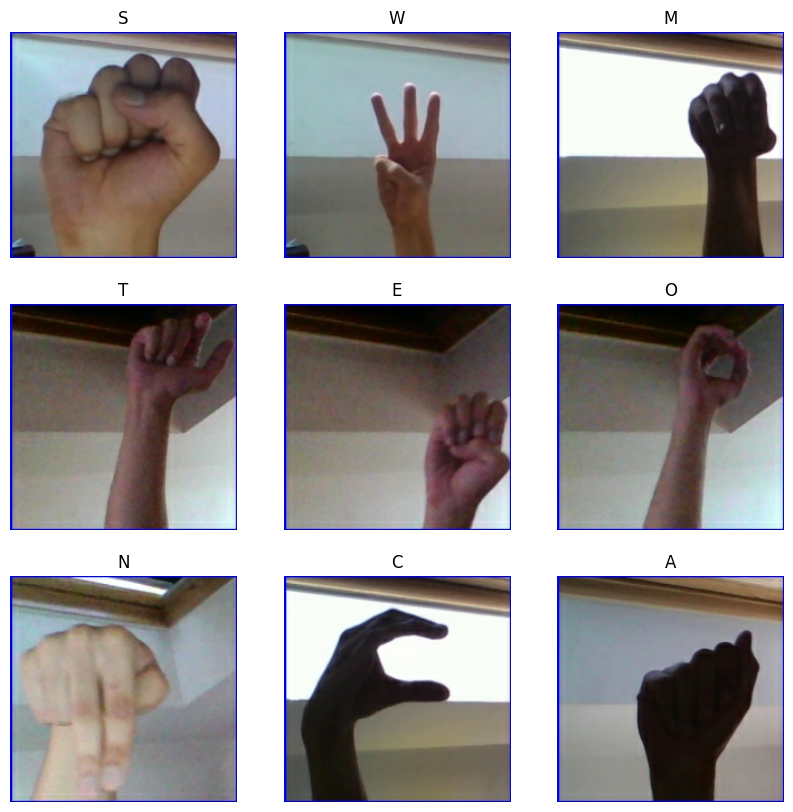

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    print(len(images))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
len(classes)

29

In [5]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 200, 3)
(32,)


2023-01-27 23:01:02.753206: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
# Optimize training and cache for disk
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
test_dir= "ASLClassification/asl_alphabet_test/other_dataset_test/asl-alphabet-test"
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
    shuffle=True,
  seed=123,
  image_size=img_size,
  batch_size=batch_size)

Found 870 files belonging to 29 classes.


In [17]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(224, 224),
  layers.Rescaling(1./255)
])

In [30]:
from keras import regularizers

num_classes = 29

model = tf.keras.Sequential([
  resize_and_rescale,
#     data_augmentation,
  tf.keras.layers.Conv2D(32, 4, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(40, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(40, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(30, 3, activation='relu', kernel_initializer='ones'),
  tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(30, 2, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_initializer='ones',
                     kernel_regularizer=regularizers.L1(0.01),
                     activity_regularizer=regularizers.L2(0.01)),
    layers.Dropout(0.10),
tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(29)
])

In [31]:
#save best fit model
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [32]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [33]:
model.fit(train_ds, epochs=20, callbacks=[model_checkpoint_callback], validation_data=test_ds, shuffle=True, verbose=1)

Epoch 1/20


2023-01-27 23:42:31.684518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2719/2719 [==============================] - ETA: 0s - loss: 9542.2891 - accuracy: 0.0340

2023-01-27 23:51:02.696309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2719/2719 [==============================] - 516s 188ms/step - loss: 9542.2891 - accuracy: 0.0340 - val_loss: 649.1380 - val_accuracy: 0.0345
Epoch 2/20
2719/2719 [==============================] - 498s 183ms/step - loss: 610.9480 - accuracy: 0.0354 - val_loss: 573.7249 - val_accuracy: 0.0345
Epoch 3/20
2719/2719 [==============================] - 477s 176ms/step - loss: 528.0139 - accuracy: 0.0405 - val_loss: 472.0713 - val_accuracy: 0.0356
Epoch 4/20
2719/2719 [==============================] - 481s 177ms/step - loss: 389.8235 - accuracy: 0.0584 - val_loss: 314.7478 - val_accuracy: 0.0575
Epoch 5/20
2719/2719 [==============================] - 482s 177ms/step - loss: 235.7367 - accuracy: 0.1010 - val_loss: 144.1377 - val_accuracy: 0.0563
Epoch 6/20
2719/2719 [==============================] - 472s 174ms/step - loss: 56.1416 - accuracy: 0.1158 - val_loss: 3.7845 - val_accuracy: 0.0678
Epoch 7/20
2719/2719 [==============================] - 465s 171ms/step - loss: 2.9322 - accuracy: 0.

In [34]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 221, 221, 32)      1568      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 108, 108, 40)      11560     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 54, 54, 40)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 52, 52, 40)       

In [3]:
print(tf.__version__)




2.9.0


In [69]:
for image_batch, labels_batch in train_ds:
  print(len(image_batch))
  print(labels_batch)
  break

32
tf.Tensor(
[24  3 23 21 25  4  9  3 18 15 25  8 27  9  8  6  9 27  1 14 14  5 13 10
 11 15  1  0 26  2  3  4], shape=(32,), dtype=int32)


In [58]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)


In [60]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224, 3),
                                               include_top=False,
                                               weights='imagenet')




In [61]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)



(32, 7, 7, 1280)


In [63]:
#Freeze layers
base_model.trainable = False




In [64]:
base_model.summary()



Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [65]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [89]:
model

In [91]:
model.save("savedModels/custom_CNNWithRegularization")





INFO:tensorflow:Assets written to: savedModels/custom_CNN/assets


INFO:tensorflow:Assets written to: savedModels/custom_CNN/assets


In [96]:
model.evaluate(train_ds.take(-1))






2719/2719 [==============================] - 116s 43ms/step - loss: 0.0042 - accuracy: 0.9986


[0.004240603651851416, 0.9986321926116943]

In [263]:
test_dir= "ASLClassification/asl_alphabet_test/asl_alphabet_test"
test_set = []

print(test_set)
for file in os.listdir(test_dir):
    if file != ".DS_Store":
        print(file)
        imagesTest = Image.open(os.path.join(test_dir, file))
        numpydata = np.asarray(imagesTest)
        if len(test_set) == 0:
            if numpydata.shape == (416,416,3):
                numpydata = np.array(numpydata)
                test_set=numpydata.reshape((1,416,416,3))
        else:
             if numpydata.shape == (416,416,3):
                numpydata = np.array(numpydata)
                numpydata=numpydata.reshape(1,416,416,3)
                test_set= np.concatenate((numpydata, test_set), axis=0)
#         test_set = np.append(test_set, numpydata)


[]
R


IsADirectoryError: [Errno 21] Is a directory: 'ASLClassification/asl_alphabet_test/other_dataset_test/asl-alphabet-test/R'

In [248]:
test_set.shape

(227, 416, 416, 3)

In [260]:
resizedImg = tf.image.resize(test_set, [224,224], preserve_aspect_ratio=True)

In [261]:
resizedImg[0]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [251]:
resizedImg = resizedImg.numpy()
resizedImg = resizedImg.reshape((-1,224,224, 3))

In [252]:
x = model.predict(resizedImg)

8/8 [==============================] - 2s 193ms/step


In [253]:
x

array([[ -63.834335 ,  -39.057846 ,    5.7023435, ...,    8.883531 ,
         -88.426094 ,  -44.45637  ],
       [ -79.4916   ,  -19.380062 ,  -59.390316 , ...,   16.400171 ,
         -93.562836 ,  -71.756485 ],
       [-104.628586 ,  -50.131695 ,   -9.107106 , ...,  -40.88568  ,
         -39.402897 ,   -3.1145453],
       ...,
       [-125.617615 ,  -40.472954 ,  -46.476147 , ...,  -42.36533  ,
         -73.67226  ,    6.3685737],
       [-111.83303  ,  -44.5562   ,  -57.114407 , ...,  -13.95484  ,
        -121.542404 ,  -21.570807 ],
       [-114.059006 ,  -60.700356 ,  -89.83997  , ...,  -55.34887  ,
         -62.37436  ,   14.771203 ]], dtype=float32)

In [255]:
real = [] 
for file in os.listdir(test_dir):
    if file != ".DS_Store" and len(file.removesuffix(".jpg")) > 1:
        real.append(file.removesuffix(".jpg"))
real.reverse()
real

['hand2_8_left_seg_5_cropped_png.rf.7ffe570bac049bb6be65e9d11942c7fa',
 'hand2_p_left_seg_5_cropped_png.rf.91b5677dc8d4e3bc9454506f246d64f7',
 'hand2_b_dif_seg_3_cropped_png.rf.84cca57def4e2b471d989d7375234533',
 'hand2_w_right_seg_2_cropped_png.rf.1398927fc901ecc0a95392df4d8b461d',
 'hand2_g_top_seg_5_cropped_png.rf.575ba6de878ed01c6ba9315b6a55e4a9',
 'hand1_a_top_seg_2_cropped_png.rf.2de15908150c8f0edc6ede39ab3c267c',
 'hand5_o_bot_seg_4_cropped_png.rf.2eddb497ad45e4cd6336375391b9b4f3',
 'hand1_v_right_seg_5_cropped_png.rf.336b649b06ca2dd38098473aa8436b29',
 'hand1_j_dif_seg_1_cropped_png.rf.b13ccc242b39a72b59447180a20e11a8',
 'hand2_f_dif_seg_4_cropped_png.rf.60c456b399e77a6b55ab27b8f7df4b66',
 'hand1_k_bot_seg_4_cropped_png.rf.ecc724df77b2ac6cf0ea0e01faaaca1e',
 'hand1_l_top_seg_2_cropped_png.rf.4bb841557564d6e428e02c9ec068fb85',
 'hand2_d_dif_seg_4_cropped_png.rf.18694906f74472d6865f062e1c657ccc',
 'hand2_s_left_seg_5_cropped_png.rf.3b04711b08587002582d1dc39b7e9a67',
 'hand5_1_dif

In [256]:
# Compare with test dataset from the same person in Kaggle

predictions = []
for results in x:
    predictions.append(classes[results.argmax()])
print(predictions)
print(real)
# print(predictions == real)

['F', 'I', 'P', 'space', 'del', 'F', 'P', 'F', 'J', 'P', 'O', 'Z', 'Q', 'F', 'Q', 'P', 'M', 'space', 'space', 'R', 'I', 'P', 'V', 'space', 'F', 'K', 'K', 'P', 'G', 'L', 'I', 'del', 'W', 'P', 'O', 'P', 'W', 'F', 'del', 'J', 'F', 'P', 'del', 'P', 'P', 'P', 'I', 'P', 'O', 'P', 'F', 'K', 'del', 'H', 'N', 'P', 'O', 'P', 'F', 'J', 'H', 'P', 'P', 'L', 'P', 'P', 'P', 'F', 'C', 'O', 'P', 'P', 'P', 'F', 'Q', 'B', 'C', 'N', 'P', 'O', 'G', 'P', 'C', 'J', 'P', 'P', 'P', 'O', 'K', 'P', 'del', 'L', 'C', 'del', 'F', 'Y', 'Y', 'P', 'F', 'H', 'C', 'I', 'nothing', 'P', 'space', 'L', 'C', 'del', 'G', 'O', 'del', 'del', 'H', 'H', 'F', 'C', 'P', 'F', 'H', 'C', 'C', 'P', 'P', 'del', 'O', 'D', 'space', 'P', 'P', 'P', 'C', 'P', 'Q', 'P', 'P', 'P', 'P', 'del', 'G', 'H', 'P', 'del', 'O', 'P', 'Y', 'K', 'H', 'Q', 'W', 'P', 'U', 'F', 'F', 'P', 'P', 'Q', 'C', 'H', 'P', 'I', 'F', 'F', 'H', 'space', 'space', 'N', 'P', 'Y', 'O', 'P', 'space', 'K', 'del', 'Y', 'P', 'del', 'F', 'B', 'P', 'I', 'F', 'L', 'Y', 'H', 'N', 'Z

Found 870 files belonging to 29 classes.


In [265]:
model.evaluate(test_ds)

28/28 [==============================] - 3s 60ms/step - loss: 37.7395 - accuracy: 0.1460


[37.739479064941406, 0.14597700536251068]

In [2]:
import numpy as np


In [12]:
x=np.load("test_data/accountant/daBAFjSxPpM.npy")

In [1]:
!ls

ASL Converter.code-workspace datasetASL
ASLClassification            epoch_024.pt
ASLClassification.zip        frontend
ASLClassificationShort       main.py
CNN_ASL_letters_1.h5         modelCNN.ipynb
IMAGE_vision                 modelYOLO.ipynb
MS-ASL                       savedModels
NLP                          test_data
README.md                    yolov7


In [13]:
x

array([], dtype=float32)

In [1]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model


In [18]:
TEST_DIR = "ASLClassification/asl_alphabet_test/other_dataset_test"
IMG_SIZE = (224,224)
test_data = image_dataset_from_directory(directory=TEST_DIR,
                                          seed=42,
                                          label_mode="int",
                                          image_size=IMG_SIZE)


# model = load_model("CNN_ASL_letters_1.h5")
# model.evaluate(test_data)

Found 870 files belonging to 29 classes.


In [19]:
MODEL_PATH = "american-sign-language_1"
model = tf.keras.models.load_model(MODEL_PATH)

In [20]:
model

In [21]:
model.evaluate(test_data)

2023-02-05 00:52:34.085201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 7s 179ms/step - loss: 14.1262 - accuracy: 0.0460


[14.126180648803711, 0.04597701132297516]